In [3]:
# Get ROI label, convert to .curv surface format and convert to volume

In [13]:
# imports should go inside the function for the function to be standalone
import os.path
import nibabel as nib
from nilearn import surface
import neuropythy as ny
import numpy as np

In [28]:
def roi_label2vol(sub_fs, label_roi_path, output_roi_path='default', hemi='left',do_plot=False):
# sub_fs - a full path to a freesurfer subject ('FREESURFER_PATH/<subID>')
# label_roi - a full path ('PATH/<roi.label>')
    if not os.path.exists(output_roi_path):
        output_roi_path = str.replace(label_roi_path,'.label','.nii.gz')
    elif output_roi_path == 'default':
        output_roi_path = str.replace(label_roi_path,'.label','.nii.gz')
        
    curv_roi_path = str.replace(output_roi_path,'.nii.gz','.curv')
    
    # load label roi
    label_roi = surface.load_surf_data(label_roi_path)
    label_roi = label_roi.astype(int)

    # hard coded hemisphere size from fsaverage (white_left/white_right)
    # instead of loading fsaverage every time we call the function
    surface_size = 163842
   
    # convert label to curv
    roi_map = np.zeros(surface_size, dtype=int)
    roi_map[label_roi] = 1
    # save surface ROI as curv file
    nib.freesurfer.io.write_morph_data(str.replace(output_roi_path,'.nii.gz','.curv'),roi_map)
    
    hemisphere = hemi[0] + 'h'

    import neuropythy.commands as nycmd
    print('Running on ROI: ' + curv_roi_path)
    print('Saving file to: ' + output_roi_path)
    nycmd.surface_to_image.main([sub_fs, output_roi_path, '-v','--' + hemisphere, curv_roi_path])
    # ---- alternative syntax ----#
    # cur_sub= ny.freesurfer_subject('SUBJECT_PATH')
    # cur_image = cur_sub.lh.to_image(roi_map)
    # cur_image.to_filename('PATH')
    # ----------------------------# 
    
    # ROIs get saved with a 4th dimension - we want to get rid of that
    roi_image = nib.load(output_roi_path)
    roi_data = roi_image.get_fdata()
    roi_data = np.squeeze(roi_data)
    new_roi_image = nib.Nifti1Image(roi_data, roi_image.affine, header=roi_image.header)
    nib.save(new_roi_image,output_roi_path)
    
    # plot ROIs for debugging
    if do_plot:
        from nilearn import plotting
        from nilearn import datasets
        import matplotlib.pyplot as plt
        # Load fsaverage
        fsaverage = datasets.fetch_surf_fsaverage('fsaverage',data_dir = '/home/groups/jyeatman/software')

        fig, axes = plt.subplots(1,2,figsize=(8,6),subplot_kw={'projection': '3d'},constrained_layout=True)
        plotting.plot_surf_roi(fsaverage['white_'+ hemi], roi_map=roi_map,
                               hemi=hemi, view='ventral',
                               bg_map=fsaverage['sulc_' + hemi], bg_on_data=False,
                               axes=axes[0],title=None)
        plotting.plot_surf_roi(fsaverage['white_'+ hemi], roi_map=roi_map,
                               hemi=hemi, view='lateral',
                               bg_map=fsaverage['sulc_'+ hemi], bg_on_data=False,
                               axes=axes[1],title=None)
        print()
    
    return

Running on ROI: /home/groups/jyeatman/ROI_Atlases/visfAtlas/Emily/lh_mOTS_chars.curv
Saving file to: /home/groups/jyeatman/ROI_Atlases/visfAtlas/Emily/lh_mOTS_chars.nii.gz
Using template image: None
Reading surfaces...
   - Reading LH file: /home/groups/jyeatman/ROI_Atlases/visfAtlas/Emily/lh_mOTS_chars.curv
Generating volume...
Exporting volume file: /home/groups/jyeatman/ROI_Atlases/visfAtlas/Emily/lh_mOTS_chars.nii.gz
surface_to_image complete!



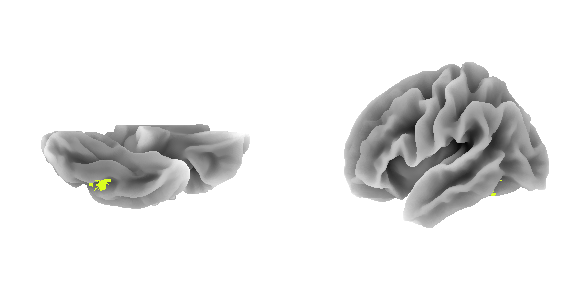

In [30]:
# Run the function with fsaverage
label_roi_path= '/home/groups/jyeatman/ROI_Atlases/visfAtlas/Emily/lh_mOTS_chars.label'
#label_roi_path= '/home/groups/jyeatman/ROI_Atlases/visfAtlas/Emily/lh_mOTS_chars.label'
sub_fs = '/scratch/groups/jyeatman/LMB_BIDS/derivatives/freesurfer/fsaverage'
roi_label2vol(sub_fs,label_roi_path,do_plot=True)